| <h1> Assignment 10.2 | <h1> ARIMA Model </h1> |
|--- | --- |
**Name:** Jomarie Dupaya
**Course and Section:** CPE019, CPE32S3 <br>
**Instructor:** Engr. Roman Richard
**Date Performed:** 4/28/24
**Date Submitted:** 5/4/24

<hr>

#Load The Dataset and Visualize the time series

Mounted at /content/drive


<ipython-input-2-697c745298c6>:19: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/data.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)


            CO2 (ppm)
Month                
1965-01-01     319.32
1965-02-01     320.36
1965-03-01     320.82
1965-04-01     322.06
1965-05-01     322.17


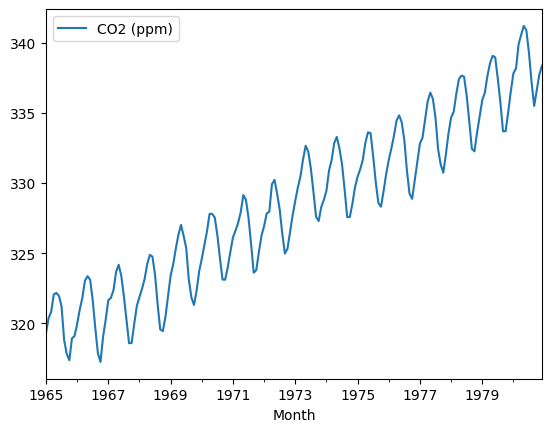

In [ ]:
import pandas as pd
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
import warnings
from math import sqrt
from sklearn.metrics import mean_squared_error
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/data.csv', index_col = 'Month', parse_dates = True)

def parser(x):
    return pd.to_datetime(x)

series = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/data.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

#Fit an ARIMA Model (baseline model order = (1,1,1))

In [ ]:
# fit an ARIMA model and plot residual errors
# load dataset
def parser(x):
    return pd.to_datetime(x)

series = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/data.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
series.index = series.index.to_period('M')

# fit model
model = ARIMA(data, order=(1,1,1))
model_fit = model.fit()

<ipython-input-2-21bda3eb0216>:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/data.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              CO2 (ppm)   No. Observations:                  192
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -225.819
Date:                Fri, 03 May 2024   AIC                            457.638
Time:                        17:10:42   BIC                            467.395
Sample:                    01-01-1965   HQIC                           461.590
                         - 12-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5590      0.087      6.441      0.000       0.389       0.729
ma.L1          0.3307      0.092      3.613      0.000       0.151       0.510
sigma2         0.6202      0.071      8.704      0.0

**Remarks:** The ARIMA(1, 1, 1) model fits well, with significant coefficients and low error variance. Autocorrelation and normality tests support its validity.

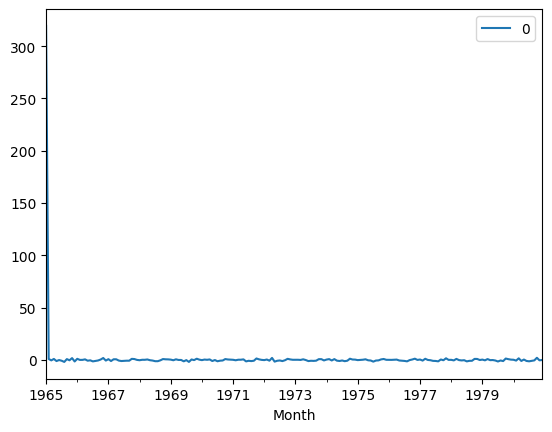

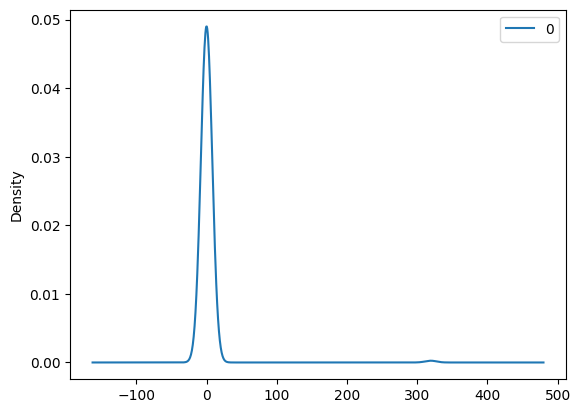



                0
count  192.000000
mean     1.698162
std     23.055889
min     -1.760398
25%     -0.571139
50%      0.034938
75%      0.566208
max    319.320000


In [ ]:
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

print("\n")
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

# summary stats of residuals
print("\n")
print(residuals.describe())

**Remarks:** Residuals has a mean close to zero however it has a high standard deviation. There are also outliers, as the maximum value is much larger than the 75th percentile.

# Improve the ARIMA Model and Print the model summary

In [ ]:
# Improve ARIMA Model
model = ARIMA(series, order=(1,3,5))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:              CO2 (ppm)   No. Observations:                  192
Model:                 ARIMA(1, 3, 5)   Log Likelihood                -222.727
Date:                Fri, 03 May 2024   AIC                            459.454
Time:                        17:10:47   BIC                            482.146
Sample:                    01-31-1965   HQIC                           468.647
                         - 12-31-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9321      0.051    -18.401      0.000      -1.031      -0.833
ma.L1         -0.1874      2.626     -0.071      0.943      -5.335       4.960
ma.L2         -1.2893      2.184     -0.590      0.5

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**Remarks:**  The ARIMA order (1, 3, 5) improves a fit over (1, 1, 1) with higher chance of likelihood. However their are some coefficients that lacks significance, indicating of a possible overfitting.

# Make a forecast (steps=10)

In [ ]:
# Splitting into train and test sets
train_size = int(len(series) * 0.75)
train_data, test_data = series[0:train_size], series[train_size:]

start = len(train_data)
end=len(train_data)+len(test_data)-1
model = ARIMA(train_data, order = (9,2,0))
results = model.fit()
predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
forecast = results.predict(len(series), len(series)+10, typ = 'levels')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
print("Forecast (steps = 10)")
print(forecast)
print("\nMSE: ", mean_squared_error(test_data, predictions))
print("RMSE: ", sqrt(mean_squared_error(test_data, predictions)))

Forecast (steps = 10)
1981-01    338.829450
1981-02    339.410077
1981-03    339.846441
1981-04    339.951027
1981-05    339.624439
1981-06    338.996781
1981-07    338.387871
1981-08    338.097810
1981-09    338.219246
1981-10    338.635268
1981-11    339.168786
Freq: M, Name: predicted_mean, dtype: float64

MSE:  1.1498843083979555
RMSE:  1.0723265866320557


**Remarks:** The model shows a forecasts of CO2 levels for 1981. It predicts a small increase from January to March, and became stable up until June, in addition a small decline around August, to be followed by small increase again. It shows that The forecast has low MSE and RMSE, indicating of a good accuracy.

# Plot the forecast

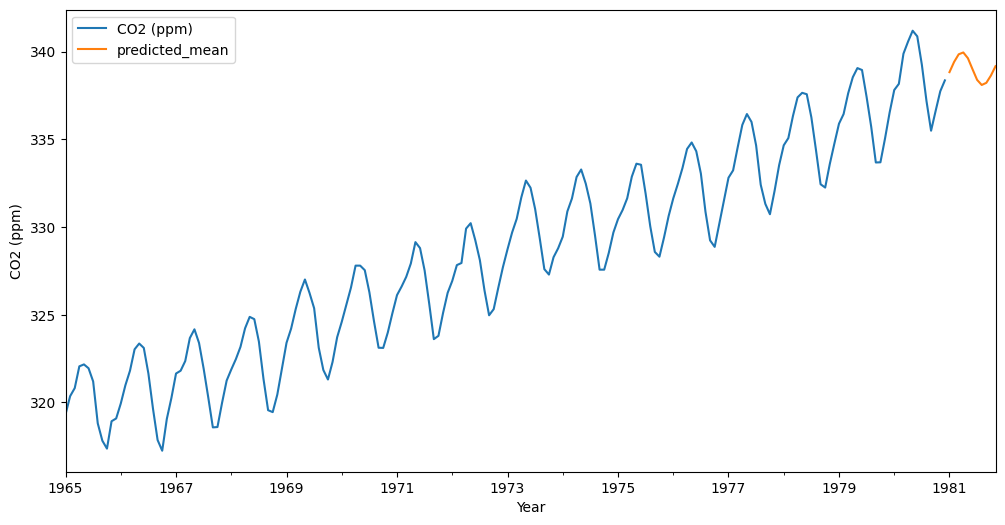

In [ ]:
formatter = ticker.StrMethodFormatter('{x:,.0f}')

ylabel='CO2 (ppm)'
xlabel='Year'
ax = series.plot(legend=True,figsize=(12,6))
forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

**Remarks:** The plot confirms that the model is able to capture the trends and patterns of the data, based on the provided numerical values of the forecast, providing valuable information for future CO2 level projections.

# Perform a grid search

In [ ]:
# grid search ARIMA parameters for time series
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(dataset, arima_order):
  train_size = int(len(data) * 0.75)
  train_data, test_data = data[0:train_size], data[train_size:]

  start = len(train_data)
  end=len(train_data)+len(test_data)-1

  model = ARIMA(train_data, order = arima_order)
  results = model.fit()
  forecast = results.predict(len(data), len(data)+10, typ = 'levels')
  predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
  mse = mean_squared_error(test_data, predictions)
  return mse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(data, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA=%s MSE=%.3f' % (best_cfg, best_score))

# evaluate parameters
import warnings
p_values = range(0,11)
d_values = range(0, 4)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(data.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=107.199
ARIMA(0, 0, 1) MSE=106.494
ARIMA(0, 0, 2) MSE=106.042
ARIMA(0, 0, 3) MSE=105.846
ARIMA(0, 1, 0) MSE=26.634
ARIMA(0, 1, 1) MSE=23.951
ARIMA(0, 1, 2) MSE=20.025
ARIMA(0, 1, 3) MSE=18.380
ARIMA(0, 2, 0) MSE=1059.451
ARIMA(0, 2, 1) MSE=942.369
ARIMA(0, 2, 2) MSE=998.307
ARIMA(0, 2, 3) MSE=6.025
ARIMA(0, 3, 0) MSE=1432.028
ARIMA(0, 3, 1) MSE=1128.208
ARIMA(0, 3, 2) MSE=945.481
ARIMA(0, 3, 3) MSE=1022.852
ARIMA(1, 0, 0) MSE=62.368
ARIMA(1, 0, 1) MSE=72.465
ARIMA(1, 0, 2) MSE=81.394
ARIMA(1, 0, 3) MSE=91.863
ARIMA(1, 1, 0) MSE=8.619
ARIMA(1, 1, 1) MSE=13.928
ARIMA(1, 1, 2) MSE=14.918
ARIMA(1, 1, 3) MSE=18.170
ARIMA(1, 2, 0) MSE=1065.125
ARIMA(1, 2, 1) MSE=1008.356
ARIMA(1, 2, 2) MSE=4.099
ARIMA(1, 2, 3) MSE=4.275
ARIMA(1, 3, 0) MSE=75819.084
ARIMA(1, 3, 1) MSE=1087.634
ARIMA(1, 3, 2) MSE=1026.289
ARIMA(1, 3, 3) MSE=1016.551
ARIMA(2, 0, 0) MSE=97.612
ARIMA(2, 0, 1) MSE=95.559
ARIMA(2, 0, 2) MSE=94.688
ARIMA(2, 0, 3) MSE=36.992
ARIMA(2, 1, 0) MSE=23.998
ARIMA(2, 1, 1)

**Remarks:** The grid search evaluates the different ARIMA models using the Mean Squared Error (MSE). ARIMA order(9, 2, 0) performs the best with the lowest MSE of 1.150, indicating an exellent forecasting accuracy.

# Supplementary

## Load the dataset andVisualize the time series

<ipython-input-3-46626701f5f3>:20: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  supple = read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/dataset_temperature.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)


            Mean monthly temperature
Month                               
1907-01-01                      33.3
1907-02-01                      46.0
1907-03-01                      43.0
1907-04-01                      55.0
1907-05-01                      51.8


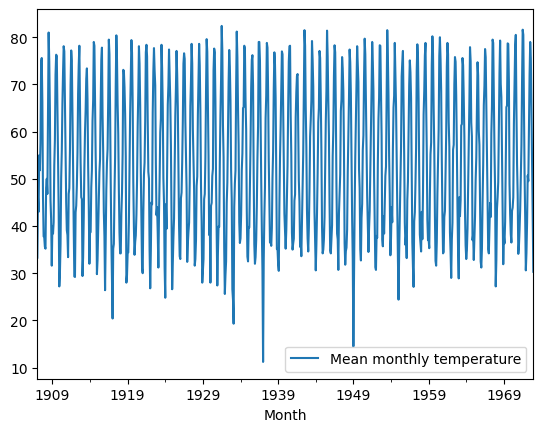

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

def parser(x):
    if isinstance(x, str):
        if x.startswith('190'):
            return datetime.strptime(x, '%Y-%m')
        else:
            try:
                return datetime.strptime(x, '%Y-%m')
            except ValueError:
                return datetime(1900, 1, 1)
    else:
        return datetime(1900, 1, 1)

supple = read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/dataset_temperature.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
supple['Mean monthly temperature'] = pd.to_numeric(supple['Mean monthly temperature'], errors='coerce')
supple.dropna(inplace=True)

print(supple.head())
supple.plot()
plt.show()

**Remarks:** loading the dataset shows the different mean monthly temperature from the year 1907 and above.

##Fit an ARIMA Model (baseline model order = (1,1,1))

In [ ]:
# fit model
model = ARIMA(supple, order=(1,1,1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
print(model_fit.summary())

                                  SARIMAX Results                                   
Dep. Variable:     Mean monthly temperature   No. Observations:                  792
Model:                       ARIMA(1, 1, 1)   Log Likelihood               -2773.596
Date:                      Sat, 04 May 2024   AIC                           5553.192
Time:                              07:09:42   BIC                           5567.212
Sample:                          01-01-1907   HQIC                          5558.581
                               - 12-01-1972                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5458      0.060      9.104      0.000       0.428       0.663
ma.L1         -0.0333      0.072     -0.462      0.644      -0.174       0.108
sigm

**Remarks:** The ARIMA order(1, 1, 1) model fits in the temperature data well. The AR coefficient is significant, which suggest that the past temperatures affect the current ones, however the MA coefficient is not. Overall, the model can be improve.

##Improve the ARIMA Model

In [ ]:
model = ARIMA(supple, order=(10,2,1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. 

##Print the model summary

In [ ]:
print(model_fit.summary())

                                  SARIMAX Results                                   
Dep. Variable:     Mean monthly temperature   No. Observations:                  792
Model:                      ARIMA(10, 2, 1)   Log Likelihood               -2305.464
Date:                      Sat, 04 May 2024   AIC                           4634.927
Time:                              07:09:59   BIC                           4690.992
Sample:                          01-01-1907   HQIC                          4656.478
                               - 12-01-1972                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4585      0.034    -13.346      0.000      -0.526      -0.391
ar.L2         -0.3948      0.033    -11.938      0.000      -0.460      -0.330
ar.L

**Remarks:** The ARIMA order(10, 2, 1) shows improvement over (1, 1, 1) with better fit, where it captured complexity, and improved residual behavior, which enhance the temperature forecasting.

##Make a forecast (steps=10)

In [ ]:
train_size_supple = int(len(supple) * 0.75)
train_data_supple, test_data_supple = supple[0:train_size_supple], supple[train_size_supple:]

start = len(train_data_supple)
end=len(train_data_supple)+len(test_data_supple)-1
model = ARIMA(train_data_supple, order = (3,0,3))
results = model.fit()
predictions_supple = results.predict(start=start, end=end, dynamic=False, type='levels')
forecast_supple = results.predict(len(supple), len(supple)+10, typ = 'levels')

print("Forecast (steps = 10)")
print(forecast_supple)

mse = mean_squared_error(test_data_supple, predictions_supple[:len(test_data_supple)])
rmse = sqrt(mse)
print("MSE: ", mse)
print("RMSE: ", rmse)

Forecast (steps = 10)
1973-01-01    32.790219
1973-02-01    34.944437
1973-03-01    42.067584
1973-04-01    52.259953
1973-05-01    62.779879
1973-06-01    70.817512
1973-07-01    74.209661
1973-08-01    72.056988
1973-09-01    64.928021
1973-10-01    54.742817
1973-11-01    44.222666
Freq: MS, Name: predicted_mean, dtype: float64
MSE:  15.662469948959755
RMSE:  3.9575838524230607


**Remarks:** The ARIMA model(3, 0, 3) forecast the first ten months of the year 1973 it suggests a temperature rise up until July, to be followed by a gradual decrese. The forecast displayed an MSE of 15.66 and RMSE of 3.96, which indicate a reasonable accuracy.

##Plot the forecast

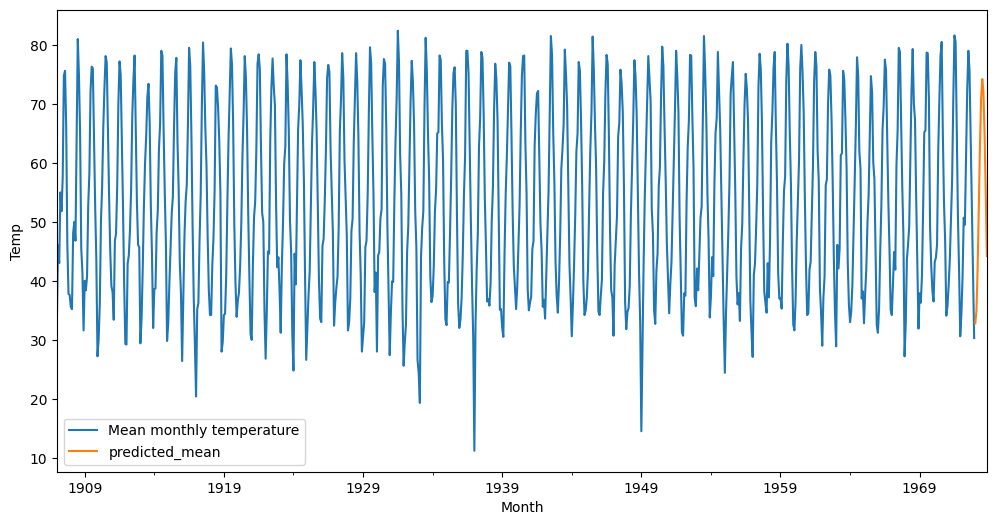

In [ ]:
formatter = ticker.StrMethodFormatter('{x:,.0f}')

ylabel='Temp'
xlabel='Month'

ax = supple.plot(legend=True,figsize=(12,6))
forecast_supple.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

**Remarks:** The plot confirms the forecast of the model, showing the results of the numerical values into a plot, providing a clear visualization of the forecasted temperature trajectory, which helps to aid in understanding the seasonal trends and potential fluctuations.

##Perform a grid search

In [ ]:
def evaluate_arima_model(dataset, arima_order):
  train_size_supple = int(len(supple) * 0.75)
  train_data_supple, test_data_supple = supple[0:train_size_supple], supple[train_size_supple:]

  start = len(train_data_supple)
  end=len(train_data_supple)+len(test_data_supple)-1

  model = ARIMA(train_data_supple, order = arima_order)
  results = model.fit()
  forecast_supple = results.predict(len(supple), len(supple)+10, typ = 'levels')
  predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
  mse = mean_squared_error(test_data_supple, predictions)
  return mse

def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(supple, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA=%s MSE=%.3f' % (best_cfg, best_score))

p_values = range(0,11)
d_values = range(0, 4)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(supple.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=244.680
ARIMA(0, 0, 1) MSE=243.522
ARIMA(0, 0, 2) MSE=241.414
ARIMA(0, 0, 3) MSE=240.950
ARIMA(0, 1, 0) MSE=495.038
ARIMA(0, 1, 1) MSE=563.035
ARIMA(0, 1, 2) MSE=762.177
ARIMA(0, 1, 3) MSE=241.417
ARIMA(0, 2, 0) MSE=1244065.976
ARIMA(0, 2, 1) MSE=1228064.280
ARIMA(0, 2, 2) MSE=1375959.214
ARIMA(0, 2, 3) MSE=1226.256
ARIMA(0, 3, 0) MSE=75530369.710
ARIMA(0, 3, 1) MSE=1146838.733
ARIMA(0, 3, 2) MSE=1228565.660
ARIMA(0, 3, 3) MSE=1377435.736
ARIMA(1, 0, 0) MSE=244.502
ARIMA(1, 0, 1) MSE=242.878
ARIMA(1, 0, 2) MSE=242.032
ARIMA(1, 0, 3) MSE=241.498
ARIMA(1, 1, 0) MSE=927.784
ARIMA(1, 1, 1) MSE=967.960
ARIMA(1, 1, 2) MSE=242.927
ARIMA(1, 1, 3) MSE=242.089
ARIMA(1, 2, 0) MSE=1304343.983
ARIMA(1, 2, 1) MSE=1337791.293
ARIMA(1, 2, 2) MSE=1669.403
ARIMA(1, 2, 3) MSE=1745.212
ARIMA(1, 3, 0) MSE=348687748.241
ARIMA(1, 3, 1) MSE=1318901.869
ARIMA(1, 3, 2) MSE=1359081.389
ARIMA(1, 3, 3) MSE=1237604.102
ARIMA(2, 0, 0) MSE=235.314
ARIMA(2, 0, 1) MSE=184.648
ARIMA(2, 0, 2) MSE=16.30

**Remarks:** The grid search evaluates the different ARIMA models using the Mean Squared Error (MSE). ARIMA order(3, 0, 3) performs the best with the lowest MSE of 15.662, indicating an exellent forecasting accuracy.

#Conclusion, Summary, and Lesson Learned

In conclusion using ARIMA model to forecast a data helps me understand or predict possible future values in time-series, where it widens the potential prediction. In summary ARIMA model creates a regression of current and predicted data and apply it to the real world application. I learned that by doing this activity will surely help me to appreciate the improtance of ARIMA model in future applications.